In [1]:
import json
import os
import math
import pickle

import numpy as np
import pandas as pd

from collections import Counter
from collections import defaultdict

from scipy import stats
from scipy.stats import ranksums

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker

import matplotlib.colors as mcolors
colors=list(mcolors.TABLEAU_COLORS.keys()) 

import seaborn as sns   

<Figure size 432x288 with 0 Axes>

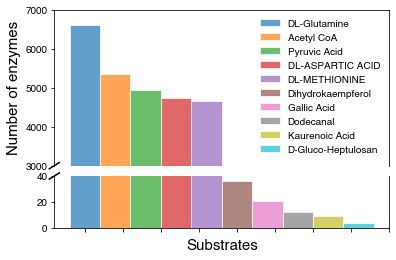

In [2]:
plt.figure(figsize=(6,4))
rc('font',**{'family':'serif','serif':['Helvetica']}) 
plt.rcParams['pdf.fonttype'] = 42

n = 3; m = 1 
gs = gridspec.GridSpec(2,1, height_ratios = [n,m],hspace=0.1) 

plt.figure()

ax = plt.subplot(gs[0,0:]) 
ax2 = plt.subplot(gs[1,0:], sharex = ax)

ax.set_ylim(3000, 7000) 
ax2.set_ylim(0, 40) 

ax.spines['bottom'].set_visible(False) 
ax2.spines['top'].set_visible(False)
ax.axes.get_xaxis().set_visible(False) 
ax.tick_params(labeltop=False)  
ax2.xaxis.tick_bottom() 

d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)

on = (n+m)/n; om = (n+m)/m
ax.plot((-d,d),(-d*on,d*on), **kwargs) 
kwargs.update(transform=ax2.transAxes) 
ax2.plot((-d,d),(1-d*om,1+d*om), **kwargs) 

n_groups = 1 
index = np.arange(n_groups) 
bar_width = 0.2 
opacity = 0.7 
error_config = {'ecolor': 'black','capsize' :2}


rects2 = ax.bar(index, 6628, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[0]],
                label='DL-Glutamine',edgecolor = 'white')  

rects4 = ax.bar(index + bar_width, 5362, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[1]],
                label='Acetyl CoA',edgecolor = 'white') 

rects4 = ax.bar(index + bar_width*2, 4954, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[2]],
                label='Pyruvic Acid',edgecolor = 'white')   

rects4 = ax.bar(index + bar_width*3, 4751, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[3]],
                label='DL-ASPARTIC ACID',edgecolor = 'white')  

rects3 = ax.bar(index + bar_width*4, 4656, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[4]],
                label='DL-METHIONINE',edgecolor = 'white')  

rects4 = ax.bar(index + bar_width*5, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[5]],
                label='Dihydrokaempferol',edgecolor = 'white')

rects4 = ax.bar(index + bar_width*6, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[6]],
                label='Gallic Acid',edgecolor = 'white')

rects4 = ax.bar(index + bar_width*7, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[7]],
                label='Dodecanal',edgecolor = 'white')

rects4 = ax.bar(index + bar_width*8, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[8]],
                label='Kaurenoic Acid',edgecolor = 'white')

rects4 = ax.bar(index + bar_width*9, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[9]],
                label='D-Gluco-Heptulosan',edgecolor = 'white')


rects1 = ax2.bar(index, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[0]],
                label='ref',edgecolor = 'white')

rects2 = ax2.bar(index + bar_width, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[1]],
                label='mut1',edgecolor = 'white')

rects3 = ax2.bar(index + bar_width*2, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[2]],
                label='mut2',edgecolor = 'white')

rects4 = ax2.bar(index + bar_width*3, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[3]],
                label='mut3',edgecolor = 'white')

rects5 = ax2.bar(index + bar_width*4, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[4]],
                label='ref',edgecolor = 'white')

rects6 = ax2.bar(index + bar_width*5, 36, bar_width,  
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[5]],
                label='Dihydrokaempferol',edgecolor = 'white')

rects7 = ax2.bar(index + bar_width*6, 21, bar_width,  
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[6]],
                label='Gallic Acid',edgecolor = 'white')

rects8 = ax2.bar(index + bar_width*7, 12, bar_width,  
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[7]],
                label='Dodecanal',edgecolor = 'white')  

rects9 = ax2.bar(index + bar_width*8, 9, bar_width, 
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[8]],
                label='Kaurenoic Acid',edgecolor = 'white')

rects10 = ax2.bar(index + bar_width*9, 4, bar_width,  
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[9]],
                label='D-Gluco-Heptulosan',edgecolor = 'white')


ax2.set_xlabel('Substrates', fontsize=15)
ax.set_ylabel('Number of enzymes', fontsize=15)

xlabels = ax2.get_xticks().tolist()
ax2.xaxis.set_major_locator(mticker.FixedLocator(xlabels))  
ax2.set_xticklabels([])
ax.legend(frameon=False,loc='upper right')

plt.savefig("./Fig_S2_molecules2enzymes.png", dpi=400, bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

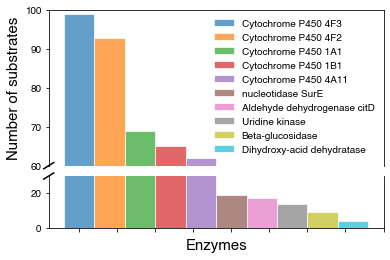

In [3]:
plt.figure(figsize=(6,4))
rc('font',**{'family':'serif','serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

n = 3; m = 1 
gs = gridspec.GridSpec(2,1, height_ratios = [n,m],hspace=0.1) 

plt.figure()

ax = plt.subplot(gs[0,0:]) 
ax2 = plt.subplot(gs[1,0:], sharex = ax)

ax.set_ylim(60, 100)  
ax2.set_ylim(0, 30)  

ax.spines['bottom'].set_visible(False) 
ax2.spines['top'].set_visible(False)
ax.axes.get_xaxis().set_visible(False) 
ax.tick_params(labeltop=False)  
ax2.xaxis.tick_bottom() 


d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)

on = (n+m)/n; om = (n+m)/m
ax.plot((-d,d),(-d*on,d*on), **kwargs) 
kwargs.update(transform=ax2.transAxes) 
ax2.plot((-d,d),(1-d*om,1+d*om), **kwargs) 


n_groups = 1 
index = np.arange(n_groups) 
bar_width = 0.2 
opacity = 0.7 
error_config = {'ecolor': 'black','capsize' :2} 


rects2 = ax.bar(index, 99, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[0]],
                label='Cytochrome P450 4F3',edgecolor = 'white') 

rects4 = ax.bar(index + bar_width, 93, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[1]],
                label='Cytochrome P450 4F2',edgecolor = 'white') 

rects4 = ax.bar(index + bar_width*2, 69, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[2]],
                label='Cytochrome P450 1A1',edgecolor = 'white')  

rects4 = ax.bar(index + bar_width*3, 65, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[3]],
                label='Cytochrome P450 1B1',edgecolor = 'white') 

rects3 = ax.bar(index + bar_width*4, 62, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[4]],
                label='Cytochrome P450 4A11',edgecolor = 'white')  

rects4 = ax.bar(index + bar_width*5, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[5]],
                label='nucleotidase SurE',edgecolor = 'white')

rects4 = ax.bar(index + bar_width*6, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[6]],
                label='Aldehyde dehydrogenase citD',edgecolor = 'white')

rects4 = ax.bar(index + bar_width*7, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[7]],
                label='Uridine kinase',edgecolor = 'white')

rects4 = ax.bar(index + bar_width*8, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[8]],
                label='Beta-glucosidase',edgecolor = 'white')

rects4 = ax.bar(index + bar_width*9, 0, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[9]],
                label='Dihydroxy-acid dehydratase',edgecolor = 'white')



rects1 = ax2.bar(index, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[0]],
                label='ref',edgecolor = 'white')

rects2 = ax2.bar(index + bar_width, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[1]],
                label='mut1',edgecolor = 'white')

rects3 = ax2.bar(index + bar_width*2, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[2]],
                label='mut2',edgecolor = 'white')

rects4 = ax2.bar(index + bar_width*3, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[3]],
                label='mut3',edgecolor = 'white')

rects5 = ax2.bar(index + bar_width*4, 100, bar_width,
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[4]],
                label='ref',edgecolor = 'white')


rects6 = ax2.bar(index + bar_width*5, 19, bar_width,  
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[5]],
                label='nucleotidase SurE',edgecolor = 'white')

rects7 = ax2.bar(index + bar_width*6, 17, bar_width, 
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[6]],
                label='Aldehyde dehydrogenase citD',edgecolor = 'white')

rects8 = ax2.bar(index + bar_width*7, 14, bar_width, 
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[7]],
                label='Uridine kinase',edgecolor = 'white')  

rects9 = ax2.bar(index + bar_width*8, 9, bar_width,  
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[8]],
                label='Beta-glucosidase',edgecolor = 'white')

rects10 = ax2.bar(index + bar_width*9, 4, bar_width,  
                alpha=opacity, color=mcolors.TABLEAU_COLORS[colors[9]],
                label='Dihydroxy-acid dehydratase',edgecolor = 'white')


ax2.set_xlabel('Enzymes', fontsize=15)
ax.set_ylabel("Number of substrates", fontsize=15)

xlabels = ax2.get_xticks().tolist()
ax2.xaxis.set_major_locator(mticker.FixedLocator(xlabels))  
ax2.set_xticklabels([])

ax.legend(frameon=False,loc='upper right')

plt.savefig("./Fig_S2_enzymes2molecules.png", dpi=400, bbox_inches = 'tight')

### The rest of the subgraphs are not presented in here because we have no right to share the whole dataset due to license issues